# Chapter 0
Imports and preliminary work

In [1]:
# for the urls for our text importing
from bs4 import BeautifulSoup
import urllib.request

# we'll need this for the median function: 
import statistics

# for looking at amiss words: 
from collections import Counter 

In [2]:
from scipy.stats import chisquare

In [3]:
# and for graphing: 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
import matplotlib.cm
import matplotlib.colors
import numpy as np

In [4]:
# here's some nlp imports and prelim work: 

# for the nlp, of course
import nltk
nltk.download('cmudict')
import re

from nltk.tokenize import word_tokenize 
from string import punctuation

# of course we'll make heavy use of this: 
mypunc = list(punctuation)
# and a unique constraint for this dataset: 
mypunc.append('--')

#print(mypunc)

[nltk_data] Downloading package cmudict to
[nltk_data]     C:\Users\NoahDiekemper\AppData\Roaming\nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


In [5]:
# some cred to this fellow for the initial get-go:
# https://stackoverflow.com/questions/25714531/find-rhyme-using-nltk-in-python

# preparatory: 
thedict = nltk.corpus.cmudict.dict()

In [6]:
# what counts as a rhyme depends on vowels
# we use this reference for cues: 
# https://www.nltk.org/_modules/nltk/corpus/reader/cmudict.html
# and otherwise hardcode this manually: 

myvowels = ['AA', 'AH', 'AW', 'AE', 'AO', 'AY', 
         'EH', 'EY', 'ER', # the ER is perhaps controversial 
          # but I am convinced that the words here encoded with it as a final phoneme
          # all rhyme
          # e.g. occur and sir
         'IH', 'IY', 'OW', 'OY', 'UH', 'UW']

In [7]:
# here we define our rhyme-testing function: 

def test_rhyme(word_a = 'move', word_b = 'love'):
    # let's return a playfully named bool 
    orange = 0
    # and this dictionary is case-sensitive so . . .
    word_a = word_a.lower()
    word_b = word_b.lower()
    # we try the first word
    try:
        syll_a = thedict[word_a]
    except KeyError:
        fix_a = 'thedict[\'%s\'] = thedict[\'%s\']' % (word_a, word_a)
        print(fix_a)
        return word_a
    # we try the second word
    try:
        syll_b = thedict[word_b]
    except KeyError:
        fix_b = 'thedict[\'%s\'] = thedict[\'%s\']' % (word_b, word_b)
        print(fix_b)
        return word_b
    # do they rhyme?
    for pron_a in syll_a:
        # english needs the final vowel sounds to match
        # for a word to rhyme
        # hence: 
        vowel = 0
        jk = 1
        # we search from the end of the word backwards
        # looking for the final vowel sound
        while (vowel == 0):
            if " ".join(re.findall("[a-zA-Z]+", pron_a[-jk])) in myvowels:
                vowel = 1
            else:
                jk += 1
        # and now we carry on
        # looking for any homophonic ending that a and b share: 
        for pron_b in syll_b:
            presumptive = 1
            # and here we test each phoneme separately 
            # and set our sub-bool to false and break it if any one fails: 
            for i in range(jk):
                myindex = i + 1
                if (" ".join(re.findall("[a-zA-Z]+", pron_a[-myindex]))  != " ".join(re.findall("[a-zA-Z]+", pron_b[-myindex])) ):
                    presumptive = 0
                    break
            if presumptive == 1:
                orange = 1
                break
    # and we return our bool
    return orange

In [8]:
# test cases: expecting results 000 111 0 11

# don't rhyme these days: 
print(test_rhyme('love', 'move'))
print(test_rhyme('loved', 'moved'))
print(test_rhyme('loved', 'proved'))

# can still rhyme with the animal
print(test_rhyme('love', 'dove'))

# rhyme bc of their last sound only
print(test_rhyme('how', 'now'))
print(test_rhyme('now', 'cow'))

# don't
print(test_rhyme('brown', 'cow'))

# but do
print(test_rhyme('brown', 'crown'))
print(test_rhyme('free', 'legacy'))

0
0
0
1
1
1
0
1
1


# Chapter 1: Supplanting Rhyme Data, Getting Sonnet Texts
In which we hardcode how a sonnet is supposed to rhyme and write basic web code to fetch the texts for us.

In [9]:
# we use a dict to tell our code
# which lines of a sonnet are meant to rhyme with which
sonnet_dict={}
sonnet_dict[0] = 2
sonnet_dict[1] = 3
sonnet_dict[4] = 6
sonnet_dict[5] = 7
sonnet_dict[8] = 10
sonnet_dict[9] = 11
sonnet_dict[12] = 13

In [10]:
# "sonnet" 126 is just a bunch (6) of rhyming couplets
# so we account for that here
dozen_dict = {}
dozen_dict[0] = 1
dozen_dict[2] = 3
dozen_dict[4] = 5
dozen_dict[6] = 7
dozen_dict[8] = 9
dozen_dict[10] = 11

In [11]:
# sonnet 99 is irregular
# so we take that into account here
nena_dict = {}
nena_dict[0] = 2
nena_dict[1] = 3
nena_dict[2] = 4
nena_dict[5] = 7
nena_dict[6] = 8
nena_dict[9] = 11
nena_dict[10] = 12
nena_dict[13] = 14

In [12]:
# here are the relics of obsolete entries 
# that weren't in NLTK's dictionary at all
# that I pseudo-manually updated
# with words that rhyme with them

# broken into multiple cells merely for readability

thedict['renewest'] =        thedict['newest']
thedict['self-killed'] =     thedict['killed']
thedict['unprovident'] =     thedict['provident']
thedict['ruinate'] =         thedict['ate']
thedict['bestowest'] =       thedict['west']

In [13]:
thedict['convertest'] =      thedict['test']
thedict['untrimmd'] =        thedict['trimmed']
thedict['growest'] =         thedict['west']
thedict['amazeth'] =         thedict['death']
thedict['a-doting'] =        thedict['doting']
thedict['stelled'] =         thedict['felled']
thedict['toild'] =           thedict['toiled']
thedict['embassage'] =       thedict['ridge']
thedict['oer'] =             thedict['oar']
thedict['re-survey'] =       thedict['survey']
thedict['equipage'] =        thedict['page']
thedict['staineth'] =        thedict['death']
thedict['invocate'] =        thedict['mate']
thedict['deceivest'] =       thedict['vest']
thedict['refusest'] =        thedict['zest']
thedict['forbear'] =         thedict['bear']

In [14]:
thedict['unrespected'] =     thedict['respected']
thedict['recured'] =         thedict['recurred']
thedict['impanneled'] =      thedict['paneled']
thedict['uprear'] =          thedict['rear']
thedict['offence'] =         thedict['offense']
thedict['wilful-slow'] =     thedict['slow']
thedict['carcanet'] =        thedict['net']
thedict['allayd'] =          thedict['allayed']
thedict['nought'] =          thedict['ought']
thedict['cheque'] =          thedict['check']
thedict['crownd'] =          thedict['crowned']
thedict['oer-worn'] =        thedict['worn']
thedict['down-razed'] =      thedict['razed']
thedict['alack'] =           thedict['lack']
thedict['jollity'] =         thedict['quality']

In [15]:
thedict['strumpeted'] =      thedict['trumpeted']
thedict['impiety'] =         thedict['piety']
thedict['outworn'] =         thedict['worn']
thedict['crownd'] =          thedict['crowned']
thedict['anon'] =            thedict['on']
thedict['niggarding'] =      thedict['building']
thedict['decayd'] =          thedict['decayed']
thedict['oer-read'] =        thedict['read']
thedict['oerlook'] =         thedict['look']
thedict['inhearse'] =        thedict['rehearse']
thedict['swerving'] =        thedict['serving']
thedict['attainted'] =       thedict['tainted']

In [16]:
thedict['offence'] =         thedict['offense']
thedict['after-loss'] =      thedict['loss']
thedict['wantonness'] =      thedict['dress']
thedict['deemd'] =           thedict['deemed']
thedict['intermixd'] =       thedict['intermixed']
thedict['esteeming'] =       thedict['teaming']
thedict['burnd'] =           thedict['burned']
thedict['dial-hand'] =       thedict['hand']
thedict['unbred'] =          thedict['bred']
thedict['wights'] =          thedict['nights']
thedict['prefiguring'] =     thedict['figuring']
thedict['staind'] =          thedict['stained']
thedict['renewd'] =          thedict['renewed']
thedict['greeing'] =         thedict['agreeing']

In [17]:
thedict['incertainty'] =     thedict['certainty']
thedict['meetness'] =        thedict['happiness']
thedict['tenderd'] =         thedict['tendered']
thedict['deemd'] =           thedict['deemed']
thedict['gatherd'] =         thedict['gathered']
thedict['honouring'] =       thedict['honoring']
thedict['savour'] =          thedict['savor']
thedict['growst'] =          thedict['most']
thedict['swayst'] =          thedict['waist']
thedict['gaol'] =            thedict['jail']
thedict['overplus'] =        thedict['plus']
thedict['fulfil'] =          thedict['fulfill']
thedict['reproving'] =       thedict['proving']
thedict['aright'] =          thedict['right']
thedict['new-fired'] =       thedict['fired']

In [18]:
thedict['viewest'] = thedict['west']
thedict['departest'] = thedict['test']
thedict['dimmd'] = thedict['dimmed']
thedict['owest'] = thedict['west']
thedict['gazeth'] = thedict['death']
thedict['foild'] = thedict['foiled']
thedict['vassalage'] = thedict['ledge']
thedict['disdaineth'] = thedict['death']
thedict['receivest'] = thedict['vest']
thedict['usest'] = thedict['zest']

In [19]:
thedict['esteemd'] = thedict['esteemed']
thedict['fixd'] = thedict['fixed']
thedict['turnd'] = thedict['turned']
thedict['reignd'] = thedict['reigned']
thedict['rememberd'] = thedict['remembered']
thedict['esteemd'] = thedict['esteemed']
thedict['unfatherd'] = thedict['bothered']
thedict['favour'] = thedict['favor']
thedict['showst'] = thedict['most']
thedict['playst'] = thedict['waist']

### Webscraping

In [20]:
# and here's the hard-coded part
# where we gather our sonnets

# first we collect all the links from a web reference page: 

sonnetlinks=[]
html_page = urllib.request.urlopen("http://shakespeare.mit.edu/Poetry/sonnets.html")
soup = BeautifulSoup(html_page, "html.parser")
for link in soup.findAll('a'):
    # and some particular scrubbing: 
    if 'amazon' not in link.get('href'):
        sonnetlinks.append('http://shakespeare.mit.edu/Poetry/' + link.get('href'))

In [21]:
# and here we actually grab the text of them: 

def get_sonnet_text(mylink):
    html_page = urllib.request.urlopen(mylink)
    soup = BeautifulSoup(html_page, "html.parser")
    foundit = soup.text
    #print(foundit)
    return foundit

sonnettexts = []
for x in sonnetlinks:
    sonnettexts.append(get_sonnet_text(x))

In [22]:
# we strike the empty lines 
# and also the 'Sonnet x' title headings
sonnets = []
for each_sonnet in sonnettexts:
    working_sonnet = each_sonnet.split('\n')
    ourlines = [x for x in working_sonnet if x != '']
    ourlines = [x for x in ourlines if 'sonnet' not in x.lower()]
    sonnets.append(ourlines)

In [23]:
sonnets[27]

['How can I then return in happy plight,',
 "That am debarr'd the benefit of rest?",
 "When day's oppression is not eased by night,",
 "But day by night, and night by day, oppress'd?",
 "And each, though enemies to either's reign,",
 'Do in consent shake hands to torture me;',
 'The one by toil, the other to complain',
 'How far I toil, still farther off from thee.',
 'I tell the day, to please them thou art bright',
 'And dost him grace when clouds do blot the heaven:',
 "So flatter I the swart-complexion'd night,",
 "When sparkling stars twire not thou gild'st the even.",
 'But day doth daily draw my sorrows longer',
 "  And night doth nightly make grief's strength",
 '  \tseem stronger.']

In [24]:
# and here's the part where we turn our sonnets
# into lists of lines of separate words
sonnets_tokenized=[]
for sonnet in sonnets:
    sonnet_tokens = []
    for line in sonnet: 
        thisline = line.replace("'", "")
        tokens = [x for x in word_tokenize(thisline) if x not in mypunc]
        # this is only a band-aid
            # fixed more minutely above, 
            # with the new dictionary entries
        # but it addresses the most common issue with axing all single quotes in this text
        tokens = [x.replace("lld", "lled") for x in tokens]
        tokens = [x.replace("rrd", "rred") for x in tokens]
        tokens = [x.replace("ssd", "ssed") for x in tokens]
        tokens = [x.replace("rmd", "rmed") for x in tokens]
        # and we don't care about capitalization for these purposes
        tokens = [x.lower() for x in tokens]
        #print(tokens)
        sonnet_tokens.append(tokens)
    sonnets_tokenized.append(sonnet_tokens)

The formatting on Sonnet 27 is weird for whatever reason, so we fix that here: 

In [25]:
sonnets_tokenized[27][-2]

['and', 'night', 'doth', 'nightly', 'make', 'griefs', 'strength']

In [26]:
sonnets_tokenized[27][-2].extend(sonnets_tokenized[27][-1])

In [27]:
sonnets_tokenized[27] = sonnets_tokenized[27][:-1]
sonnets_tokenized[27]

[['how', 'can', 'i', 'then', 'return', 'in', 'happy', 'plight'],
 ['that', 'am', 'debarred', 'the', 'benefit', 'of', 'rest'],
 ['when', 'days', 'oppression', 'is', 'not', 'eased', 'by', 'night'],
 ['but', 'day', 'by', 'night', 'and', 'night', 'by', 'day', 'oppressed'],
 ['and', 'each', 'though', 'enemies', 'to', 'eithers', 'reign'],
 ['do', 'in', 'consent', 'shake', 'hands', 'to', 'torture', 'me'],
 ['the', 'one', 'by', 'toil', 'the', 'other', 'to', 'complain'],
 ['how', 'far', 'i', 'toil', 'still', 'farther', 'off', 'from', 'thee'],
 ['i', 'tell', 'the', 'day', 'to', 'please', 'them', 'thou', 'art', 'bright'],
 ['and',
  'dost',
  'him',
  'grace',
  'when',
  'clouds',
  'do',
  'blot',
  'the',
  'heaven'],
 ['so', 'flatter', 'i', 'the', 'swart-complexiond', 'night'],
 ['when',
  'sparkling',
  'stars',
  'twire',
  'not',
  'thou',
  'gildst',
  'the',
  'even'],
 ['but', 'day', 'doth', 'daily', 'draw', 'my', 'sorrows', 'longer'],
 ['and',
  'night',
  'doth',
  'nightly',
  'make'

# Chapter II: Looking for Anomalies

In [28]:
# and we look for the pairs of lines
# that don't rhyme

anomalies=[]
sonnet_tallies = []
for i, sonnet in enumerate(sonnets_tokenized):
    
    sonnet_rhymes=[]

    # so we have 3 different cases 
    # literally bc of the 2 irregular poems here
    
    if len(sonnet) == 14:
        for index in list(sonnet_dict.keys()):
            word_a = sonnet[sonnet_dict[index]][-1]
            word_b = sonnet[index][-1]
            dothey = test_rhyme(word_a, word_b)
            # we note whether a pair rhymes or not
            sonnet_rhymes.append(dothey)
            if dothey == 0:
                # and if not, append the info to the anomalies
                anomalies.append([i, index, sonnet_dict[index], word_a, word_b])
        sonnet_tallies.append(sonnet_rhymes)
    elif len(sonnet) == 12:
        for index in list(dozen_dict.keys()):
            word_a = sonnet[dozen_dict[index]][-1]
            word_b = sonnet[index][-1]
            dothey = test_rhyme(word_a, word_b)
            sonnet_rhymes.append(dothey)
            if dothey == 0:
                anomalies.append([i, index, dozen_dict[index], word_a, word_b])
        sonnet_tallies.append(sonnet_rhymes)
    elif len(sonnet) == 15:
        for index in list(nena_dict.keys()):
            word_a = sonnet[nena_dict[index]][-1]
            word_b = sonnet[index][-1]
            dothey = test_rhyme(word_a, word_b)
            sonnet_rhymes.append(dothey)
            if dothey == 0:
                anomalies.append([i, index, nena_dict[index], word_a, word_b])
        sonnet_tallies.append(sonnet_rhymes)
    else:
        print("Huh!!", i, sonnet)
#print(anomalies)
#print(sonnet_tallies)

So, some questions to ask of our data: 

In [29]:
print("How many rhymes were attempted?")
print(sum([len(x) for x in sonnet_tallies]))

How many rhymes were attempted?
1078


In [30]:
print("How many fail?")
print(len(anomalies))

How many fail?
161


"Only about 15% of the individual rhymes that Shakespeare wrote into his collection fail."

In [31]:
print("What percent % is that?")
print(len(anomalies)/sum([len(x) for x in sonnet_tallies]))

What percent % is that?
0.14935064935064934


In [32]:
# so we tally up the rhymes that still work . . .
accuracies = [sum(x)/len(x) for x in sonnet_tallies]
#print(accuracies)

In [33]:
# so what is the breakdown of % failure by sonnet?
myc = Counter(accuracies)
myc

Counter({0.7142857142857143: 28,
         0.8571428571428571: 69,
         0.5714285714285714: 8,
         1.0: 46,
         0.42857142857142855: 3})

In [34]:
# can we order those by frequency?
inorder = myc.most_common(6)
orderedlist = [x for x in inorder]
orderedlist

[(0.8571428571428571, 69),
 (1.0, 46),
 (0.7142857142857143, 28),
 (0.5714285714285714, 8),
 (0.42857142857142855, 3)]

"The tragedy is that they are sufficiently spread out that 70% of his sonnets have some sort of infection."

In [35]:
print("So how many register as imperfect?")
print(len(accuracies) - myc[1.0])
print((len(accuracies) - myc[1.0])/154)

So how many register as imperfect?
108
0.7012987012987013


So what % *of sonnets* have which rates of failure? Here are the %s sorted by decreasing success rate: 

"45%―nearly half―of Shakespeare’s sonnets suffer one lone lapse, while another 30% of them have endured completely intact."

In [36]:
percent_working = [x for x in myc]
the_counts = [myc[x] for x in myc]
zipped_lists = zip(percent_working, the_counts)
sorted_zipped_lists = sorted(zipped_lists, reverse=True)
sorted_list1 = [element/154 for _, element in sorted_zipped_lists]
sorted_list1

[0.2987012987012987,
 0.44805194805194803,
 0.18181818181818182,
 0.05194805194805195,
 0.01948051948051948]

. . . and here is the same question sorted by decreasing size of that category: 

In [37]:
[x[1]/154 for x in orderedlist]

[0.44805194805194803,
 0.2987012987012987,
 0.18181818181818182,
 0.05194805194805195,
 0.01948051948051948]

And here is our histogram!!

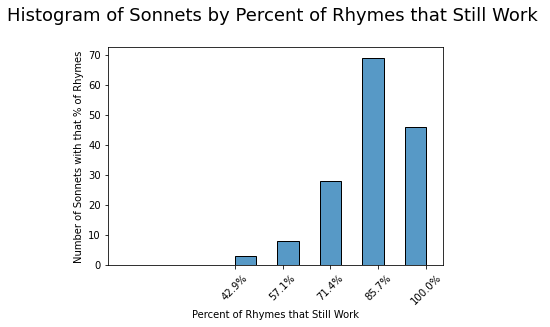

In [38]:
# and we graph them

ax = sns.histplot(accuracies)
ax.set_xlim(0.05, 1.05)
ax.set_title("Histogram of Sonnets by Percent of Rhymes that Still Work \n",
            fontsize=18)

ax.set_xlabel("Percent of Rhymes that Still Work")
ax.set_ylabel("Number of Sonnets with that % of Rhymes")
myxlabels=[str(round(x*100, 1))+'%' for x in list(set(accuracies))]
plt.xticks(ticks=list(set(accuracies)), labels=myxlabels, rotation=45)
plt.show()

Now, which individual words are giving us so much trouble?

In [39]:
%%time

justthewordsmaam = [x[-2:] for x in anomalies]
#print(justthewordsmaam)

words = [item for sublist in justthewordsmaam for item in sublist]
#print(words)

d = Counter(words)
#print(d)

sordidwords = sorted(d.items(), key=lambda pair: pair[1], reverse=True)
commonsordid = [x for x in sordidwords if x[1] > 1]
print(commonsordid)

[('love', 13), ('alone', 9), ('prove', 9), ('gone', 6), ('are', 6), ('one', 5), ('eye', 5), ('tongue', 5), ('come', 4), ('wrong', 4), ('moan', 4), ('spent', 4), ('argument', 4), ('memory', 3), ('bear', 3), ('tomb', 3), ('blood', 3), ('dead', 3), ('forth', 3), ('worth', 3), ('care', 3), ('is', 3), ('near', 3), ('where', 3), ('doom', 3), ('die', 2), ('was', 2), ('majesty', 2), ('age', 2), ('were', 2), ('counterfeit', 2), ('song', 2), ('buried', 2), ('even', 2), ('heaven', 2), ('past', 2), ('invent', 2), ('desert', 2), ('amiss', 2), ('remedy', 2), ('approve', 2), ('appear', 2), ('dumb', 2), ('affords', 2), ('words', 2), ('good', 2), ('there', 2), ('fiend', 2)]
Wall time: 4.5 ms


How many different rhyme-pairs are failing?

In [40]:
mypairs=[]
for x in justthewordsmaam:
    y = [each.lower() for each in x]
    y.sort()
    y = tuple(y)
    mypairs.append(y)
nonrhymes = Counter(mypairs)
print("How many rhyme pairs now fail?")
print(len(list(nonrhymes.keys())))

print("And how many total failures are there, again?")
print(len(anomalies))

sordidpairs = sorted(nonrhymes.items(), key=lambda pair: pair[1], reverse=True)
commonpairs = [x for x in sordidpairs if x[1] > 1]
print(commonpairs)

How many rhyme pairs now fail?
129
And how many total failures are there, again?
161
[(('love', 'prove'), 9), (('alone', 'gone'), 4), (('alone', 'one'), 4), (('forth', 'worth'), 3), (('are', 'care'), 3), (('argument', 'spent'), 3), (('tongue', 'wrong'), 3), (('come', 'doom'), 3), (('song', 'tongue'), 2), (('even', 'heaven'), 2), (('gone', 'moan'), 2), (('amiss', 'is'), 2), (('approve', 'love'), 2), (('dumb', 'tomb'), 2), (('affords', 'words'), 2), (('blood', 'good'), 2)]


In [41]:
print("Wait, how many have 'love'?")
print([x for x in list(nonrhymes.keys()) if 'love' in x])

Wait, how many have 'love'?
[('love', 'prove'), ('love', 'move'), ('approve', 'love'), ('love', 'remove')]


In [42]:
print("What aboud loved with a D?")
print([x for x in list(nonrhymes.keys()) if 'loved' in x])

What aboud loved with a D?
[('loved', 'proved')]


In [43]:
print("And that shows up how many times?")
print(nonrhymes[('loved', 'proved')])

And that shows up how many times?
1


More questions to ask of the sonnets: 

In [44]:
sonn_rhymes = [len(x) for x in sonnet_tallies]
Counter(sonn_rhymes)

Counter({7: 152, 8: 1, 6: 1})

In [45]:
# and here we ask for the normal sonnet indices 
# of the ones which are still intact
# we add 1 because Python indexes from 0 while Shakespeare does not
good_indices = [i+1 for i, x in enumerate(sonnet_tallies) if 0 not in x]
print("This many are still intact: ", len(good_indices))
print("Their indices are: ", good_indices)
# oh look, number 130.

This many are still intact:  46
Their indices are:  [9, 11, 20, 21, 22, 24, 40, 41, 43, 51, 57, 58, 65, 68, 69, 73, 77, 82, 87, 88, 92, 96, 98, 99, 104, 108, 111, 113, 114, 118, 119, 120, 122, 125, 126, 127, 128, 129, 130, 131, 134, 135, 141, 143, 148, 150]


In [46]:
# which have one error?
one_indices = [i+1 for i, x in enumerate(sonnet_tallies) if x.count(0)==1]
print("This many have one issue: ", len(one_indices))
print("Their indices are: ", one_indices)

This many have one issue:  69
Their indices are:  [2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 18, 23, 26, 27, 28, 29, 32, 33, 35, 36, 37, 42, 44, 48, 50, 53, 54, 55, 56, 59, 60, 62, 63, 64, 67, 70, 71, 75, 76, 80, 81, 83, 84, 85, 89, 90, 91, 93, 95, 100, 101, 103, 106, 109, 110, 115, 117, 121, 124, 137, 138, 139, 140, 142, 144, 146, 149, 152, 153]


In [47]:
# which have two?
twoindices = [i+1 for i, x in enumerate(sonnet_tallies) if x.count(0)==2]
print("This many have two issues: ", len(twoindices))
print("Their indices are: ", twoindices)
# oh look, number 130.

This many have two issues:  28
Their indices are:  [1, 13, 15, 19, 25, 30, 31, 34, 38, 39, 45, 46, 47, 52, 74, 78, 79, 86, 97, 102, 112, 123, 132, 133, 136, 145, 147, 151]


In [48]:
# which have three?
three_indices = [i+1 for i, x in enumerate(sonnet_tallies) if x.count(0)==3]
print("This many have three issues: ", len(three_indices))
print("Their indices are: ", three_indices)
# oh look, number 130.

This many have three issues:  8
Their indices are:  [7, 17, 61, 66, 94, 105, 107, 116]


In [49]:
# which have 4?
four_indices = [i+1 for i, x in enumerate(sonnet_tallies) if x.count(0)==4]
print("This many have four issues: ", len(four_indices))
print("Their indices are: ", four_indices)
# oh look, number 130.

This many have four issues:  3
Their indices are:  [49, 72, 154]


In [50]:
# and they cap out here: 
five_indices = [i+1 for i, x in enumerate(sonnet_tallies) if x.count(0)==5]
print("This many have five issues: ", len(five_indices))
print("Their indices are: ", five_indices)

This many have five issues:  0
Their indices are:  []


# Chapter III: The Rhymes

In [51]:
# here we define a rhyme-sound-returning function: 
# it's possible we won't actually need this
# unless we want to streamline code for a different corollary

def rhyme_sound(word_a = 'move'):

    # and this dictionary is case-sensitive so . . .
    word_a = word_a.lower()
    
    # we try the first word
    try:
        syll_a = thedict[word_a]
    except KeyError:
        fix_a = 'thedict[\'%s\'] = thedict[\'%s\']' % (word_a, word_a)
        print(fix_a)
        return word_a
    
    # and what sound is it?
    for pron_a in syll_a:
        # english needs the final vowel sounds to match
        # for a word to rhyme
        # hence: 
        vowel = 0
        jk = 1
        # we search from the end of the word backwards
        # looking for the final vowel sound
        finalsound = ""
        
        while (vowel == 0):
            finalsound = " ".join(re.findall("[a-zA-Z]+", pron_a[-jk])) + finalsound
            if " ".join(re.findall("[a-zA-Z]+", pron_a[-jk])) in myvowels:
                vowel = 1
            else:
                jk += 1
                
        
        return finalsound

In [52]:
print(rhyme_sound('move'))
print(rhyme_sound('love'))
print(rhyme_sound('dove'))
print(rhyme_sound('of'))
print(rhyme_sound('smooth'))
print(rhyme_sound('behoove'))
print(rhyme_sound('read'))
print(rhyme_sound('lead'))
print(rhyme_sound('led'))
print(rhyme_sound('mead'))
print(rhyme_sound('said'))
print(rhyme_sound('seed'))

UWV
AHV
AHV
AHV
UWDH
UWV
EHD
EHD
EHD
IYD
EHD
IYD


In [53]:
# here we define our rhyme-testing function: 

def test_rhyme_sound(word_a = 'move', word_b = 'love'):
    # let's return a playfully named bool 
    orange = 0

    # and this dictionary is case-sensitive so . . .
    word_a = word_a.lower()
    word_b = word_b.lower()
    
    # we try the first word
    try:
        syll_a = thedict[word_a]
    except KeyError:
        fix_a = 'thedict[\'%s\'] = thedict[\'%s\']' % (word_a, word_a)
        print(fix_a)
        return word_a
    # we try the second word
    try:
        syll_b = thedict[word_b]
    except KeyError:
        fix_b = 'thedict[\'%s\'] = thedict[\'%s\']' % (word_b, word_b)
        print(fix_b)
        return word_b
    
    # do they rhyme?
    for pron_a in syll_a:
        # english needs the final vowel sounds to match
        # for a word to rhyme
        # hence: 
        vowel = 0
        jk = 1
        # we search from the end of the word backwards
        # looking for the final vowel sound
        while (vowel == 0):
            if " ".join(re.findall("[a-zA-Z]+", pron_a[-jk])) in myvowels:
                vowel = 1
            else:
                jk += 1
        # and now we carry on
        # looking for any homophonic ending that a and b share: 
        for pron_b in syll_b:
            presumptive = 1
            # and here we test each phoneme separately 
            # and set our sub-bool to false and break it if any one fails: 
            for i in range(jk):
                myindex = i + 1
                if (" ".join(re.findall("[a-zA-Z]+", pron_a[-myindex]))  != " ".join(re.findall("[a-zA-Z]+", pron_b[-myindex])) ):
                    presumptive = 0
                    break                   
            if presumptive == 1:
                orange = 1
                finalsound = ""
                vowel = 0
                mn = 1
                while (vowel == 0):
                    finalsound = " ".join(re.findall("[a-zA-Z]+", pron_a[-mn])) + finalsound
                    if " ".join(re.findall("[a-zA-Z]+", pron_a[-mn])) in myvowels:
                        vowel = 1
                    else:
                        mn += 1
                break
    if orange == 0:
        finalsound = ""
        vowel = 0
        mn = 1
        while (vowel == 0):
            finalsound = " ".join(re.findall("[a-zA-Z]+", pron_a[-mn])) + finalsound
            if " ".join(re.findall("[a-zA-Z]+", pron_a[-mn])) in myvowels:
                vowel = 1
            else:
                mn += 1
    # and we return our bool and our sound
    return orange, finalsound

In [54]:
# some test cases

print(test_rhyme_sound('lead', 'read'))
print(test_rhyme_sound('lead', 'bed'))
print(test_rhyme_sound('mead', 'read'))

(1, 'IYD')
(1, 'EHD')
(1, 'IYD')


In [55]:
# some more test cases 

dothey, thesound = test_rhyme_sound('lead', 'read')
print(dothey)
print(thesound)

1
IYD


In [56]:
rhymingtuples=[]

for i, sonnet in enumerate(sonnets_tokenized):
    
    #sonnet_rhymes=[]
    
    if len(sonnet) == 14:
        for index in list(sonnet_dict.keys()):
            word_a = sonnet[sonnet_dict[index]][-1]
            word_b = sonnet[index][-1]
            
            dothey, thesound = test_rhyme_sound(word_a, word_b)
            rhymingtuples.append([dothey, thesound, word_a, word_b])
    elif len(sonnet) == 12:
        for index in list(dozen_dict.keys()):

            word_a = sonnet[dozen_dict[index]][-1]
            word_b = sonnet[index][-1]
            dothey, thesound = test_rhyme_sound(word_a, word_b)
            rhymingtuples.append([dothey, thesound, word_a, word_b])

    elif len(sonnet) == 15:
        for index in list(nena_dict.keys()):

            word_a = sonnet[nena_dict[index]][-1]
            word_b = sonnet[index][-1]
            dothey, thesound = test_rhyme_sound(word_a, word_b)
            rhymingtuples.append([dothey, thesound, word_a, word_b])
    else:
        print("Huh!!", i, sonnet)
        

In [57]:
print(len(rhymingtuples))

1078


In [58]:
rhymingtuples[:5]

[[1, 'IYS', 'decease', 'increase'],
 [0, 'IY', 'memory', 'die'],
 [1, 'AYZ', 'lies', 'eyes'],
 [1, 'UWL', 'cruel', 'fuel'],
 [0, 'EHNT', 'content', 'ornament']]

In [59]:
rhymingsounds = [x[1] for x in rhymingtuples]
rhymingsounds[:5]

['IYS', 'IY', 'AYZ', 'UWL', 'EHNT']

In [60]:
rhymesoundsfreq = Counter(rhymingsounds)
#rhymesoundsfreq

In [61]:
len(rhymesoundsfreq.items())

194

In [62]:
sorted(rhymesoundsfreq.items(), key=lambda pair: pair[1], reverse=True)

[('IY', 98),
 ('AYT', 39),
 ('EY', 34),
 ('ER', 31),
 ('OW', 28),
 ('UW', 25),
 ('IHNG', 24),
 ('EHR', 23),
 ('IHL', 22),
 ('AART', 21),
 ('EYT', 20),
 ('EHST', 20),
 ('AYD', 19),
 ('AHN', 18),
 ('OWN', 17),
 ('AYND', 16),
 ('EHND', 15),
 ('AYZ', 14),
 ('AYM', 14),
 ('EYN', 14),
 ('EYS', 13),
 ('AY', 13),
 ('AOR', 13),
 ('EHL', 12),
 ('AW', 11),
 ('OWLD', 11),
 ('EHNT', 10),
 ('EYZ', 10),
 ('AYN', 10),
 ('EYM', 9),
 ('EHD', 9),
 ('IHR', 9),
 ('UWM', 8),
 ('IHT', 8),
 ('UWV', 8),
 ('AONG', 8),
 ('IHD', 8),
 ('UWZ', 7),
 ('IHV', 7),
 ('EYK', 7),
 ('EHNS', 7),
 ('OWZ', 7),
 ('EHN', 7),
 ('EYD', 7),
 ('ERS', 7),
 ('IYN', 7),
 ('AEND', 7),
 ('IHZ', 6),
 ('EYJH', 6),
 ('IYD', 6),
 ('EYST', 6),
 ('AHV', 6),
 ('IYDZ', 6),
 ('UWTH', 6),
 ('IYS', 5),
 ('AYF', 5),
 ('EHKT', 5),
 ('AOT', 5),
 ('AORT', 5),
 ('AOL', 5),
 ('UHK', 5),
 ('AHS', 5),
 ('AWND', 5),
 ('AORN', 5),
 ('AAT', 5),
 ('ERD', 5),
 ('AHST', 4),
 ('AOZ', 4),
 ('IYT', 4),
 ('IYP', 4),
 ('IHN', 4),
 ('IYF', 4),
 ('AOS', 4),
 ('IHS', 4

In [63]:
# how many different/unique rhyming sounds appear?
len(rhymesoundsfreq.items())

194

In [64]:
# what is the median number of times
# that a rhyming sound gets used?

all_tallies = [x[1] for x in rhymesoundsfreq.items()]
statistics.median(all_tallies)

2.0

In [65]:
# so which sounds are the most common? 

common_sounds = rhymesoundsfreq.most_common(20)
common_sounds[:10]

[('IY', 98),
 ('AYT', 39),
 ('EY', 34),
 ('ER', 31),
 ('OW', 28),
 ('UW', 25),
 ('IHNG', 24),
 ('EHR', 23),
 ('IHL', 22),
 ('AART', 21)]

In [66]:
# we separate the halves of our list of tuples
# for easy use in a plot

cs_labels = [x[0] for x in common_sounds]
cs_tallies = [x[1] for x in common_sounds]
print(cs_labels)
print(cs_tallies)

['IY', 'AYT', 'EY', 'ER', 'OW', 'UW', 'IHNG', 'EHR', 'IHL', 'AART', 'EYT', 'EHST', 'AYD', 'AHN', 'OWN', 'AYND', 'EHND', 'AYZ', 'AYM', 'EYN']
[98, 39, 34, 31, 28, 25, 24, 23, 22, 21, 20, 20, 19, 18, 17, 16, 15, 14, 14, 14]


In [67]:
print(sum([x[1] for x in rhymesoundsfreq.items()]))
print("And we expect approximately ", 7*154)

1078
And we expect approximately  1078


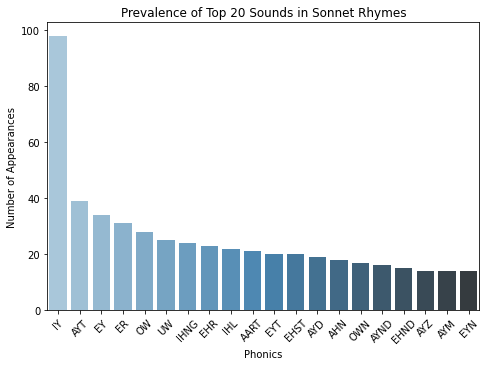

<Figure size 1200x1000 with 0 Axes>

In [68]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(cs_labels,cs_tallies)
plt.xticks(rotation=45)

ax = sns.barplot(y= cs_tallies, x = cs_labels, palette=("Blues_d"))

# set the labels
ax.set_title('Prevalence of Top 20 Sounds in Sonnet Rhymes')
ax.set_ylabel('Number of Appearances')
ax.set_xlabel('Phonics')

figure(num=None, figsize=(12, 10), dpi=100, facecolor='w', edgecolor='k')

plt.show()

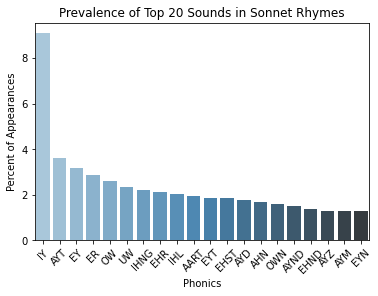

<Figure size 1200x1000 with 0 Axes>

In [69]:
fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])

ax.bar(cs_labels,cs_tallies)
plt.xticks(rotation=45)
cs_percentz = [100*x/len(rhymingtuples) for x in cs_tallies]
ax = sns.barplot(y = cs_percentz, x = cs_labels, palette=("Blues_d"))

# set the labels
ax.set_title('Prevalence of Top 20 Sounds in Sonnet Rhymes')
ax.set_ylabel('Percent of Appearances')
ax.set_xlabel('Phonics')

figure(num=None, figsize=(12, 10), dpi=100, facecolor='w', edgecolor='k')

plt.show()

# Chapter IV: Word Frequencies

In [70]:
# so let's just look at the words: 
rhymedpairs = [x[2:] for x in rhymingtuples]
# and let's consider all the words together,
# how often they appear: 
rhymedwords = [t for sublist in rhymedpairs for t in sublist]
rhymedwords[:20]

['decease',
 'increase',
 'memory',
 'die',
 'lies',
 'eyes',
 'cruel',
 'fuel',
 'content',
 'ornament',
 'niggarding',
 'spring',
 'thee',
 'be',
 'now',
 'brow',
 'held',
 'field',
 'eyes',
 'lies']

In [71]:
print(len(rhymedwords))

2156


In [72]:
wordsfreq = Counter(rhymedwords)
sortedwordsfreq = sorted(wordsfreq.items(), key=lambda pair: pair[1], reverse=True)
sortedwordslots = [x for x in sortedwordsfreq if x[1] > 9]
sortedwordslots

[('thee', 48),
 ('me', 33),
 ('be', 22),
 ('heart', 17),
 ('sight', 16),
 ('eyes', 14),
 ('time', 14),
 ('love', 14),
 ('alone', 12),
 ('away', 12),
 ('night', 12),
 ('you', 12),
 ('still', 11),
 ('day', 11),
 ('so', 11),
 ('part', 11),
 ('days', 10),
 ('art', 10),
 ('will', 10),
 ('state', 10),
 ('lie', 10),
 ('show', 10)]

In [73]:
swf_labels = [x[0] for x in sortedwordslots]
swf_tallies = [x[1] for x in sortedwordslots]
print(swf_labels)
print(swf_tallies)

['thee', 'me', 'be', 'heart', 'sight', 'eyes', 'time', 'love', 'alone', 'away', 'night', 'you', 'still', 'day', 'so', 'part', 'days', 'art', 'will', 'state', 'lie', 'show']
[48, 33, 22, 17, 16, 14, 14, 14, 12, 12, 12, 12, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10]


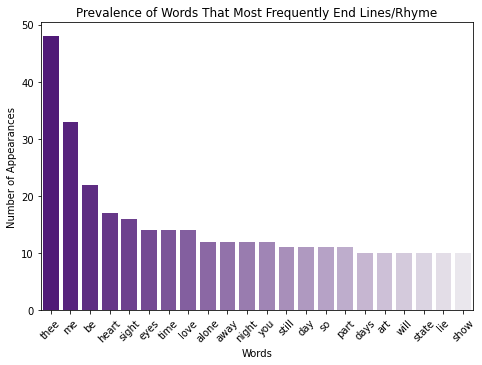

<Figure size 1200x1000 with 0 Axes>

In [75]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(swf_labels,swf_tallies)
plt.xticks(rotation=45)

#expplt = sns.cubehelix_palette(start=8, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
expplt = sns.light_palette("indigo", as_cmap=True, reverse = True)
plt.cm.register_cmap("mycolormap", expplt)
cpal = sns.color_palette("mycolormap", n_colors=len(swf_labels))
ax = sns.barplot(y= swf_tallies, x = swf_labels, palette=cpal)

# set the labels
ax.set_title('Prevalence of Words That Most Frequently End Lines/Rhyme')
ax.set_ylabel('Number of Appearances')
ax.set_xlabel('Words')

figure(num=None, figsize=(12, 10), dpi=100, facecolor='w', edgecolor='k')

plt.show()

In [76]:
print("How many *different* words did he use to end lines?")
print(len(wordsfreq.keys()))

print("And what was the median usage of such words?")
word_tallies = [x[1] for x in wordsfreq.items()]
print(statistics.median(word_tallies))

How many *different* words did he use to end lines?
1024
And what was the median usage of such words?
1.0


In [77]:
print("So how many are used exactly once to end a line?")
print(len([x[1] for x in sortedwordsfreq if x[1] == 1]))
print("Out of how many unique line-ending words, again?")
print(len(sortedwordsfreq))
print("So what % is that?")
print((len([x[1] for x in sortedwordsfreq if x[1] == 1]))/len(sortedwordsfreq))

So how many are used exactly once to end a line?
673
Out of how many unique line-ending words, again?
1024
So what % is that?
0.6572265625


# Chapter V: Contingency Analysis 
Demonstrating "If you’re wondering whether final couplets happened to fare better or worse than any of the quatrains, generally, the answer is: not really. Within the sonnets, the now-slant rhymes show up fairly “vertically” spread out between the three quatrains and the final couplet. Across the collection, 15% of rhymes now fail while 85% still work; grouping all the rhymes attempted in those four categories we find “success rates” between 82% and 88%, variation readily explained by random chance."

We eliminate the two irregular sonnets from our  analysis.

In [78]:
normal_tokenized = sonnets_tokenized
normal_tokenized.pop(125)
normal_tokenized.pop(98)
# and double check that it worked: 
print(max([len(x) for x in normal_tokenized]))
print(min([len(x) for x in normal_tokenized]))

14
14


### Couplets: 

In [79]:
couplet_tokens = [x[-2:] for x in normal_tokenized]
couplet_tokens[:5]

[[['pity', 'the', 'world', 'or', 'else', 'this', 'glutton', 'be'],
  ['to', 'eat', 'the', 'worlds', 'due', 'by', 'the', 'grave', 'and', 'thee']],
 [['this', 'were', 'to', 'be', 'new', 'made', 'when', 'thou', 'art', 'old'],
  ['and',
   'see',
   'thy',
   'blood',
   'warm',
   'when',
   'thou',
   'feelst',
   'it',
   'cold']],
 [['but', 'if', 'thou', 'live', 'rememberd', 'not', 'to', 'be'],
  ['die', 'single', 'and', 'thine', 'image', 'dies', 'with', 'thee']],
 [['thy', 'unused', 'beauty', 'must', 'be', 'tombd', 'with', 'thee'],
  ['which', 'used', 'lives', 'th', 'executor', 'to', 'be']],
 [['but', 'flowers', 'distilled', 'though', 'they', 'with', 'winter', 'meet'],
  ['leese',
   'but',
   'their',
   'show',
   'their',
   'substance',
   'still',
   'lives',
   'sweet']]]

In [80]:
# and we look for the pairs of lines
# that don't rhyme
couplet_rhymes = []
couplet_anomalies=[]
for i, couplet in enumerate(couplet_tokens):

    word_a = couplet[0][-1]
    word_b = couplet[1][-1]
    dothey = test_rhyme(word_a, word_b)
    # we note whether a pair rhymes or not
    couplet_rhymes.append(dothey)
    if dothey == 0:
        # and if not, append the info to the anomalies
        couplet_anomalies.append([i, word_a, word_b])

In [81]:
couplet_anomalies

[[6, 'noon', 'son'],
 [18, 'wrong', 'young'],
 [24, 'beloved', 'removed'],
 [31, 'prove', 'love'],
 [33, 'sheds', 'deeds'],
 [41, 'one', 'alone'],
 [60, 'elsewhere', 'near'],
 [65, 'gone', 'alone'],
 [70, 'moan', 'gone'],
 [71, 'forth', 'worth'],
 [77, 'advance', 'ignorance'],
 [94, 'privilege', 'edge'],
 [100, 'tongue', 'song'],
 [103, 'alone', 'one'],
 [105, 'monument', 'spent'],
 [114, 'proved', 'loved'],
 [115, 'prove', 'love'],
 [134, 'erred', 'transferred'],
 [151, 'prove', 'love']]

In [82]:
1 - sum(couplet_rhymes)/len(couplet_rhymes)

0.125

### Q1

In [83]:
qone_tokens = [x[:4] for x in normal_tokenized]
qone_tokens[:5]

[[['from', 'fairest', 'creatures', 'we', 'desire', 'increase'],
  ['that', 'thereby', 'beautys', 'rose', 'might', 'never', 'die'],
  ['but', 'as', 'the', 'riper', 'should', 'by', 'time', 'decease'],
  ['his', 'tender', 'heir', 'might', 'bear', 'his', 'memory']],
 [['when', 'forty', 'winters', 'shall', 'beseige', 'thy', 'brow'],
  ['and', 'dig', 'deep', 'trenches', 'in', 'thy', 'beautys', 'field'],
  ['thy', 'youths', 'proud', 'livery', 'so', 'gazed', 'on', 'now'],
  ['will', 'be', 'a', 'tatterd', 'weed', 'of', 'small', 'worth', 'held']],
 [['look',
   'in',
   'thy',
   'glass',
   'and',
   'tell',
   'the',
   'face',
   'thou',
   'viewest'],
  ['now', 'is', 'the', 'time', 'that', 'face', 'should', 'form', 'another'],
  ['whose', 'fresh', 'repair', 'if', 'now', 'thou', 'not', 'renewest'],
  ['thou', 'dost', 'beguile', 'the', 'world', 'unbless', 'some', 'mother']],
 [['unthrifty', 'loveliness', 'why', 'dost', 'thou', 'spend'],
  ['upon', 'thyself', 'thy', 'beautys', 'legacy'],
  ['na

In [84]:
# and we look for the pairs of lines
# that don't rhyme
qone_rhymes = []
qone_anomalies=[]
for i, couplet in enumerate(qone_tokens):

    word_a = couplet[0][-1]
    word_b = couplet[1][-1]
    word_c = couplet[2][-1]
    word_d = couplet[3][-1]
    dothey = test_rhyme(word_a, word_c)
    dothey2 = test_rhyme(word_b, word_d)
    # we note whether a pair rhymes or not
    qone_rhymes.append(dothey)
    qone_rhymes.append(dothey2)
    if dothey == 0:
        # and if not, append the info to the anomalies
        qone_anomalies.append([i, word_a, word_c])
    if dothey2 == 0:
        # and if not, append the info to the anomalies
        qone_anomalies.append([i, word_b, word_d])

In [85]:
qone_anomalies

[[0, 'die', 'memory'],
 [1, 'field', 'held'],
 [2, 'viewest', 'renewest'],
 [6, 'eye', 'majesty'],
 [12, 'are', 'prepare'],
 [14, 'moment', 'comment'],
 [16, 'come', 'tomb'],
 [16, 'deserts', 'parts'],
 [17, 'temperate', 'date'],
 [18, 'brood', 'blood'],
 [25, 'vassalage', 'embassage'],
 [26, 'tired', 'expired'],
 [29, 'past', 'waste'],
 [30, 'dead', 'buried'],
 [32, 'eye', 'alchemy'],
 [35, 'one', 'alone'],
 [37, 'invent', 'excellent'],
 [45, 'war', 'bar'],
 [51, 'key', 'survey'],
 [54, 'monuments', 'contents'],
 [55, 'said', 'allayd'],
 [58, 'is', 'amiss'],
 [61, 'eye', 'remedy'],
 [63, 'defaced', 'down-razed'],
 [65, 'cry', 'jollity'],
 [66, 'live', 'achieve'],
 [71, 'love', 'prove'],
 [73, 'arrest', 'interest'],
 [93, 'none', 'stone'],
 [96, 'been', 'seen'],
 [96, 'year', 'where'],
 [100, 'appear', 'where'],
 [101, 'forth', 'worth'],
 [105, 'come', 'doom'],
 [108, 'there', 'dear'],
 [114, 'love', 'remove'],
 [133, 'near', 'there'],
 [135, 'lies', 'subtleties'],
 [136, 'wrong', 'ton

In [86]:
1 - sum(qone_rhymes)/len(qone_rhymes)

0.13486842105263153

### Q2

In [87]:
qtwo_tokens = [x[4:8] for x in normal_tokenized]
qtwo_tokens[:5]

[[['but', 'thou', 'contracted', 'to', 'thine', 'own', 'bright', 'eyes'],
  ['feedst', 'thy', 'lightst', 'flame', 'with', 'self-substantial', 'fuel'],
  ['making', 'a', 'famine', 'where', 'abundance', 'lies'],
  ['thyself', 'thy', 'foe', 'to', 'thy', 'sweet', 'self', 'too', 'cruel']],
 [['then', 'being', 'askd', 'where', 'all', 'thy', 'beauty', 'lies'],
  ['where', 'all', 'the', 'treasure', 'of', 'thy', 'lusty', 'days'],
  ['to', 'say', 'within', 'thine', 'own', 'deep-sunken', 'eyes'],
  ['were', 'an', 'all-eating', 'shame', 'and', 'thriftless', 'praise']],
 [['for', 'where', 'is', 'she', 'so', 'fair', 'whose', 'uneard', 'womb'],
  ['disdains', 'the', 'tillage', 'of', 'thy', 'husbandry'],
  ['or', 'who', 'is', 'he', 'so', 'fond', 'will', 'be', 'the', 'tomb'],
  ['of', 'his', 'self-love', 'to', 'stop', 'posterity']],
 [['then', 'beauteous', 'niggard', 'why', 'dost', 'thou', 'abuse'],
  ['the', 'bounteous', 'largess', 'given', 'thee', 'to', 'give'],
  ['profitless', 'usurer', 'why', 'dost

In [88]:
# and we look for the pairs of lines
# that don't rhyme
qtwo_rhymes = []
qtwo_anomalies=[]
for i, couplet in enumerate(qtwo_tokens):

    word_a = couplet[0][-1]
    word_b = couplet[1][-1]
    word_c = couplet[2][-1]
    word_d = couplet[3][-1]
    dothey = test_rhyme(word_a, word_c)
    dothey2 = test_rhyme(word_b, word_d)
    # we note whether a pair rhymes or not
    qtwo_rhymes.append(dothey)
    qtwo_rhymes.append(dothey2)
    if dothey == 0:
        # and if not, append the info to the anomalies
        qtwo_anomalies.append([i, word_a, word_c])
    if dothey2 == 0:
        # and if not, append the info to the anomalies
        qtwo_anomalies.append([i, word_b, word_d])

In [89]:
qtwo_anomalies

[[5, 'loan', 'one'],
 [6, 'age', 'pilgrimage'],
 [7, 'ear', 'bear'],
 [11, 'herd', 'beard'],
 [12, 'were', 'bear'],
 [14, 'sky', 'memory'],
 [15, 'unset', 'counterfeit'],
 [24, 'spread', 'buried'],
 [28, 'possessed', 'least'],
 [33, 'break', 'speak'],
 [34, 'compare', 'are'],
 [38, 'one', 'alone'],
 [44, 'gone', 'alone'],
 [46, 'feast', 'guest'],
 [47, 'are', 'care'],
 [48, 'pass', 'was'],
 [48, 'eye', 'gravity'],
 [51, 'rare', 'are'],
 [52, 'counterfeit', 'set'],
 [53, 'dye', 'wantonly'],
 [60, 'pry', 'jealousy'],
 [65, 'strumpeted', 'disabled'],
 [69, 'approve', 'love'],
 [71, 'desert', 'impart'],
 [74, 'anon', 'alone'],
 [77, 'fly', 'majesty'],
 [78, 'argument', 'invent'],
 [79, 'bear', 'appear'],
 [80, 'have', 'grave'],
 [84, 'words', 'affords'],
 [85, 'dead', 'astonished'],
 [92, 'eye', 'history'],
 [93, 'expense', 'excellence'],
 [98, 'spent', 'argument'],
 [105, 'presage', 'age'],
 [110, 'tongue', 'wrong'],
 [113, 'accidents', 'intents'],
 [119, 'blood', 'good'],
 [121, 'admire'

In [90]:
1 - sum(qtwo_rhymes)/len(qtwo_rhymes)

0.17434210526315785

### Q3

In [91]:
qthr_tokens = [x[8:12] for x in normal_tokenized]
qthr_tokens[:5]

[[['thou', 'that', 'art', 'now', 'the', 'worlds', 'fresh', 'ornament'],
  ['and', 'only', 'herald', 'to', 'the', 'gaudy', 'spring'],
  ['within', 'thine', 'own', 'bud', 'buriest', 'thy', 'content'],
  ['and', 'tender', 'churl', 'makest', 'waste', 'in', 'niggarding']],
 [['how', 'much', 'more', 'praise', 'deserved', 'thy', 'beautys', 'use'],
  ['if', 'thou', 'couldst', 'answer', 'this', 'fair', 'child', 'of', 'mine'],
  ['shall', 'sum', 'my', 'count', 'and', 'make', 'my', 'old', 'excuse'],
  ['proving', 'his', 'beauty', 'by', 'succession', 'thine']],
 [['thou', 'art', 'thy', 'mothers', 'glass', 'and', 'she', 'in', 'thee'],
  ['calls', 'back', 'the', 'lovely', 'april', 'of', 'her', 'prime'],
  ['so', 'thou', 'through', 'windows', 'of', 'thine', 'age', 'shall', 'see'],
  ['despite', 'of', 'wrinkles', 'this', 'thy', 'golden', 'time']],
 [['for', 'having', 'traffic', 'with', 'thyself', 'alone'],
  ['thou', 'of', 'thyself', 'thy', 'sweet', 'self', 'dost', 'deceive'],
  ['then', 'how', 'when'

In [92]:
# and we look for the pairs of lines
# that don't rhyme
qthr_rhymes = []
qthr_anomalies=[]
for i, couplet in enumerate(qthr_tokens):

    word_a = couplet[0][-1]
    word_b = couplet[1][-1]
    word_c = couplet[2][-1]
    word_d = couplet[3][-1]
    dothey = test_rhyme(word_a, word_c)
    dothey2 = test_rhyme(word_b, word_d)
    # we note whether a pair rhymes or not
    qthr_rhymes.append(dothey)
    qthr_rhymes.append(dothey2)
    if dothey == 0:
        # and if not, append the info to the anomalies
        qthr_anomalies.append([i, word_a, word_c])
    if dothey2 == 0:
        # and if not, append the info to the anomalies
        qthr_anomalies.append([i, word_b, word_d])

In [93]:
qthr_anomalies

[[0, 'ornament', 'content'],
 [3, 'alone', 'gone'],
 [4, 'glass', 'was'],
 [9, 'love', 'prove'],
 [13, 'art', 'convert'],
 [16, 'tongue', 'song'],
 [22, 'eloquence', 'recompense'],
 [27, 'heaven', 'even'],
 [29, 'foregone', 'moan'],
 [30, 'gone', 'alone'],
 [36, 'despised', 'sufficed'],
 [37, 'worth', 'forth'],
 [38, 'prove', 'love'],
 [43, 'gone', 'moan'],
 [44, 'recured', 'assured'],
 [45, 'impanneled', 'determined'],
 [46, 'love', 'move'],
 [48, 'here', 'uprear'],
 [48, 'desert', 'part'],
 [49, 'on', 'groan'],
 [59, 'brow', 'mow'],
 [60, 'great', 'defeat'],
 [62, 'fortify', 'memory'],
 [71, 'this', 'is'],
 [73, 'dead', 'remembered'],
 [75, 'argument', 'spent'],
 [78, 'word', 'afford'],
 [82, 'dumb', 'tomb'],
 [83, 'clear', 'where'],
 [85, 'intelligence', 'thence'],
 [88, 'tongue', 'wrong'],
 [89, 'last', 'taste'],
 [90, 'cost', 'boast'],
 [93, 'die', 'dignity'],
 [99, 'dumb', 'tomb'],
 [103, 'argument', 'spent'],
 [103, 'words', 'affords'],
 [104, 'prophecies', 'eyes'],
 [107, 'bloo

In [94]:
1 - sum(qthr_rhymes)/len(qthr_rhymes)

0.1578947368421053

In [95]:
genstat = (sum(couplet_rhymes) + sum(qone_rhymes) + sum(qtwo_rhymes) + sum(qthr_rhymes)) / (len(couplet_rhymes) + len(qone_rhymes) + len(qtwo_rhymes) + len(qthr_rhymes))
genstat

0.8486842105263158

In [96]:
theobsvs = [sum(couplet_rhymes), sum(qone_rhymes), sum(qtwo_rhymes), sum(qthr_rhymes)]
theobsvs

[133, 263, 251, 256]

In [97]:
totals = [len(couplet_rhymes), len(qone_rhymes), len(qtwo_rhymes), len(qthr_rhymes)]
expected = [genstat *  x for x in totals]
expected

[129.0, 258.0, 258.0, 258.0]

In [98]:
chisquare(theobsvs, expected)

Power_divergenceResult(statistic=0.4263565891472868, pvalue=0.9347456052794686)

In [99]:
stuff = [couplet_rhymes, qone_rhymes, qtwo_rhymes, qthr_rhymes]
success = [sum(x)/len(x) for x in stuff]
success

[0.875, 0.8651315789473685, 0.8256578947368421, 0.8421052631578947]